# Explore AuxTel Prompt Processing Subtractions
Michael Wood-Vasey  
Started: 2023-08-16

Goals:
1. Locate and load sample AuxTel run from recent observations in 2023 July
2. Visualize an image
3. Find a subtraction.
4. Display template, science, subtraction
5. Check out performance of DIA
6. Write note with 1-3 suggestions for improvement of DIA

References
1. Track Prompt Processing AuxTel runs here  
    https://confluence.lsstcorp.org/display/DM/Prompt+Processing+with+AuxTel+Imaging+Survey+Data+2023  
    
LATISS/prompt/output-2023-05-24/ApPipe/prompt-proto-service-00026  
LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
import lsst.afw.display as afwDisplay
from lsst.analysis.tools.actions.vector import ConvertUnits, FlagSelector, GoodDiaSourceSelector, LoadVector
from lsst.analysis.tools.atools import SkySourceHistPlot, SkySourceSkyPlot, NumDiaSourcesAllMetric, NumDiaSourcesMetric, NumDipolesMetric
from lsst.daf.butler import Butler
import lsst.geom as geom

In [3]:
afwDisplay.setDefaultBackend('matplotlib')

In [4]:
%matplotlib inline

In [5]:
repo = "/sdf/group/rubin/repo/embargo/"

In [6]:
butler = Butler(repo)

I here use the command-line `butler query-collections` to get the info.  I couldn't figure out the in-Python Butler equivalent.

Here are the DRP-type processing for 2023 August

  I pass "LATISS\*runs\*2023-08\*" to get only collections from LATISS that have dates from 2023 August.

In [7]:
! butler query-collections /sdf/group/rubin/repo/embargo "LATISS*runs*2023-08*"

                                           Name                                                Type   
------------------------------------------------------------------------------------------ -----------
LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598                    CHAINED    
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230818T023338Z RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230817T203705Z RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230816T210927Z RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230816T143458Z RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A/w_2023_19/PREOPS-3613/20230815T190131Z           RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-07B/w_2023_19/PREOPS-3598/20230726T155846Z           RUN        
  LATISS/runs/AUXTEL_DRP_IMAGING_2023-07A-05AB/w_2023_19/PREOPS-3562/2023

In [11]:
# Neven - This produces similar, but not identical result via python
# code here: https://github.com/lsst/daf_butler/blob/11710eee44873e6cf90023bbc40d1745b61480a4/python/lsst/daf/butler/_registry_shim.py#L280
butler.registry.queryCollections("LATISS*runs*2023-08*", flattenChains=True, includeChains=True)

['LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230816T143458Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230816T210927Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_19/PREOPS-3598/20230818T023338Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230821T153036Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230828T153937Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230828T145332Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230825T142344Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230823T142229Z',
 'LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A-07AB-05AB/w_2023_33/PREOPS-3613/20230822T175428Z',
 'LATISS/raw/all',
 'LATISS/calib/DM-39505/crosstalk.20230602',
 'LATISS/calib/DM-38946

And here's the AP-ish Prompt Processing (prototype) collection

In [12]:
! butler query-collections /sdf/group/rubin/repo/embargo "LATISS/prompt/*-2023-08*/ApPipe/*"

                               Name                               Type
----------------------------------------------------------------- ----
LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010 RUN 
LATISS/prompt/output-2023-08-16/ApPipe/prompt-proto-service-00011 RUN 
LATISS/prompt/output-2023-08-17/ApPipe/prompt-proto-service-00011 RUN 


In [15]:
ap_collection = "LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010"
drp_collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A/w_2023_19/PREOPS-3613"

In [ ]:
! butler query-dataset-types /sdf/group/rubin/repo/embargo

In [ ]:
! butler query-datasets /sdf/group/rubin/repo/embargo \
    --collections "LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A/w_2023_19/PREOPS-3613" \
    --where "instrument='LATISS' and detector=0 and band='r' and visit > 2023080100000 and visit < 2023080500000"  \
    calexp

In [ ]:
! butler query-datasets /sdf/group/rubin/repo/embargo \
    --collections "LATISS/runs/AUXTEL_DRP_IMAGING_2023-08A/w_2023_19/PREOPS-3613" \
    --where "instrument='LATISS' and detector=0 and band='r' and visit > 2023080100000 and visit < 2023080500000"  \
    deepDiff_differenceExp

In [ ]:
! butler query-datasets /sdf/group/rubin/repo/embargo \
    --where "instrument='LATISS' and detector=0 and band='r' and visit > 2023080100000 and visit < 2023080500000"  \
    deepDiff_differenceExp

In [ ]:
! butler query-datasets /sdf/group/rubin/repo/embargo \
    --collections "LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010" \
    --where "instrument='LATISS' and detector=0 and band='r' and visit > 2023080100000 and visit < 2023082500000" \
    deepDiff_differenceExp

In [ ]:
! butler query-datasets /sdf/group/rubin/repo/embargo \
    --collections "LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010" \
    --where "instrument='LATISS' and detector=0 and band='r' and visit > 2023080100000 and visit < 2023082500000" 

In [13]:
# DRP 2023-08-03 reduction
# data_id = {"instrument": "LATISS", "detector": 0, "band": "r", "visit": 2023080300670}
# drp_collection

# AP 2023-08-15 reduction
# ap_collection
data_id = {"instrument": "LATISS", "detector": 0, "band": "r", "visit": 2023081500112}

In [23]:
calexp = butler.get("calexp", dataId=data_id, collections=ap_collection)

In [17]:
calexp

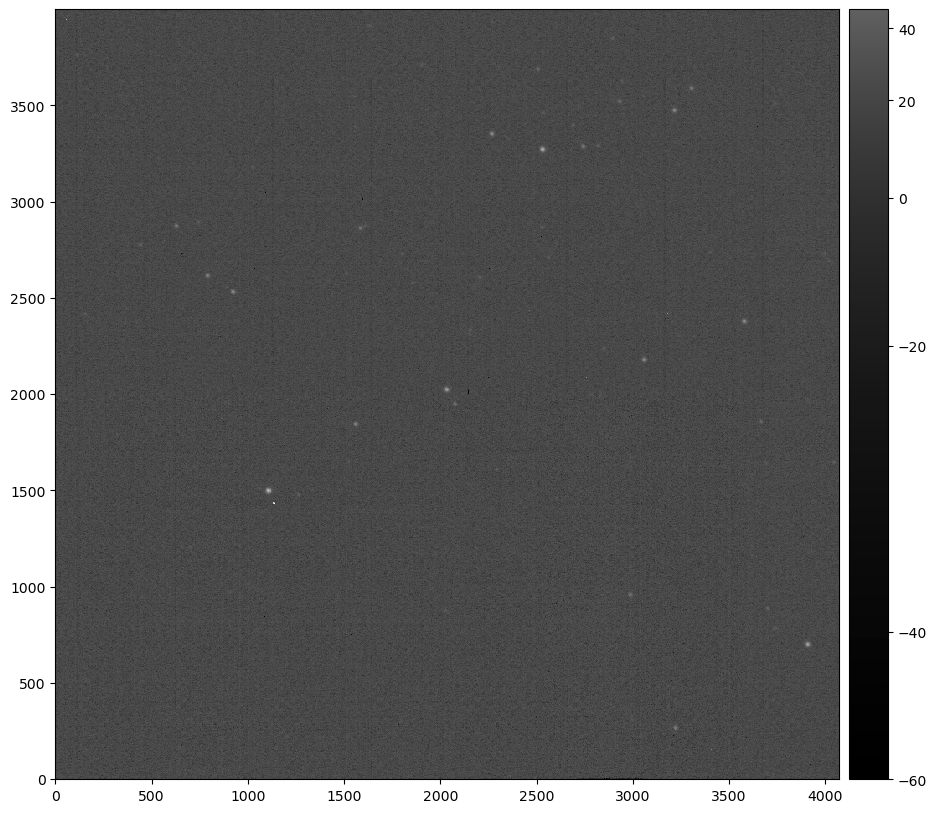

In [21]:
fig = plt.figure(figsize=(12, 10))
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(calexp.image)
plt.show()

In [24]:
diff = butler.get("deepDiff_differenceExp", dataId=data_id, collections=ap_collection)

In [25]:
# Includes detections and sky sources. Direct output from detect+measure after image subtraction.
diaSrc = butler.get("deepDiff_diaSrc", dataId=data_id, collections=ap_collection)
# The SDM/DPDD (Science Data Model/Data Products Definition Document) version of the diaSrc Table. No sky sources.  Flags are packed into uint64.
diaSrcTable = butler.get("deepDiff_diaSrcTable", dataId=data_id, collections=ap_collection)

In [26]:
diaSrcTable["flags"]

0          332
1            0
2            0
3            0
4      8388940
        ...   
152    8388608
153        332
154    8388940
155    8388940
156    8388940
Name: flags, Length: 157, dtype: uint64

In [27]:
PIXEL_FLAG_LIST = [
    'base_PixelFlags_flag_offimage', 'base_PixelFlags_flag_edge', 'base_PixelFlags_flag_interpolated',
    'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_cr', 'base_PixelFlags_flag_bad',
    'base_PixelFlags_flag_suspect', 'base_PixelFlags_flag_interpolatedCenter', 'base_PixelFlags_flag_saturatedCenter',
    'base_PixelFlags_flag_crCenter', 'base_PixelFlags_flag_suspectCenter'
]
SHAPE_FLAG_LIST = ["slot_Shape_flag"]
EDGE_FLAG_LIST = ["base_NaiveCentroid_flag_edge", "base_SdssCentroid_flag_edge"]
SKY_SOURCE = ["sky_source"]

FLAG_LIST = PIXEL_FLAG_LIST + SHAPE_FLAG_LIST + EDGE_FLAG_LIST + SKY_SOURCE

SNR_THRESHOLD = 5.5

def get_good_sources_idx(df, flag_list=FLAG_LIST, snr_threshold=SNR_THRESHOLD):
    bad = np.array(np.zeros_like(df), dtype=bool)
    for flag in flag_list:
        bad |= df[flag]

    snr = df["slot_ApFlux_instFlux"] / df["slot_ApFlux_instFluxErr"]
    # This is a diff so take things both above the positive SNR cut and below the negative SNR cut
    good_snr = (snr < -snr_threshold) | (snr > snr_threshold)
        
    good = ~bad
    good &= good_snr
    return good

In [28]:
good_source_idx = get_good_sources_idx(diaSrc)

In [29]:
good_sources = diaSrc.asAstropy()[good_source_idx]

In [30]:
len(good_sources)

3

In [45]:
template = butler.get("deepDiff_templateExp", dataId=data_id, collections=ap_collection)
matched_template = butler.get("deepDiff_matchedExp", dataId=data_id, collections=ap_collection)

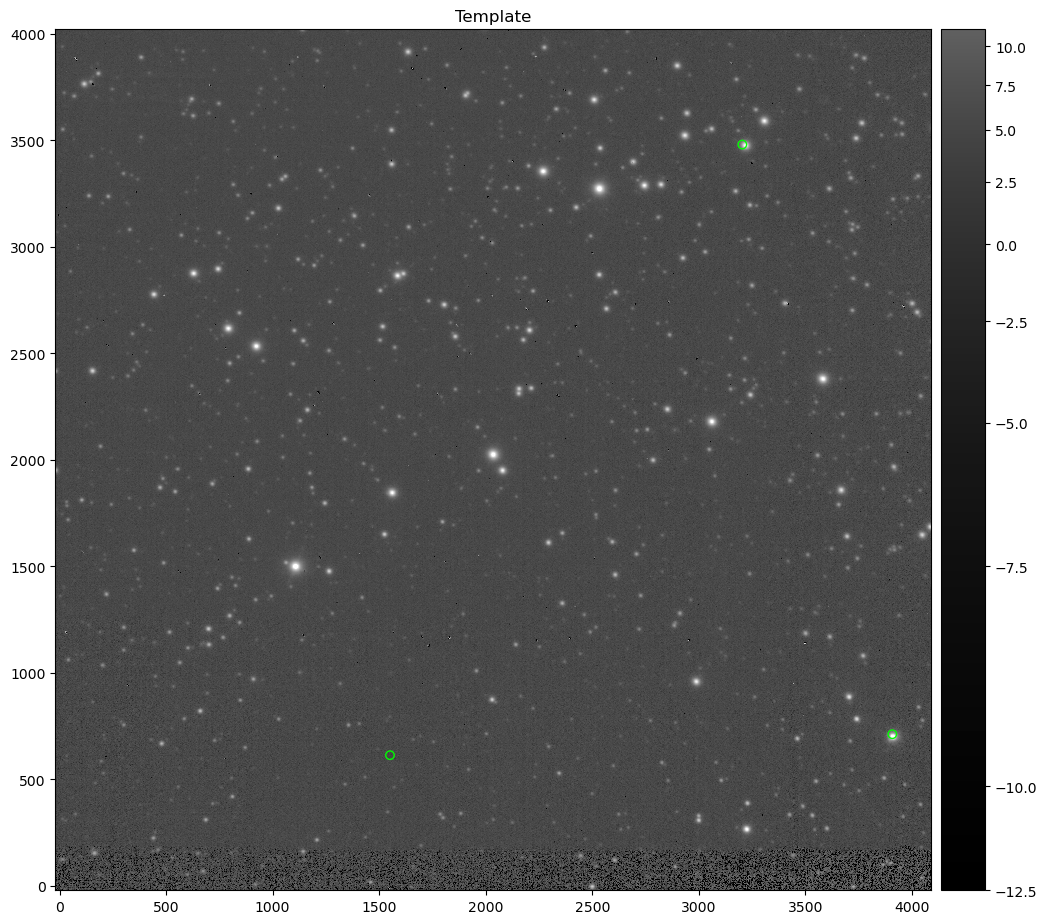

In [43]:
fig = plt.figure(figsize=(12, 12))
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(template.image)
for x, y in good_sources[["slot_Centroid_x", "slot_Centroid_y"]]:
    display.dot("o", x, y, ctype="green", size=20)
plt.title('Template')
plt.show()


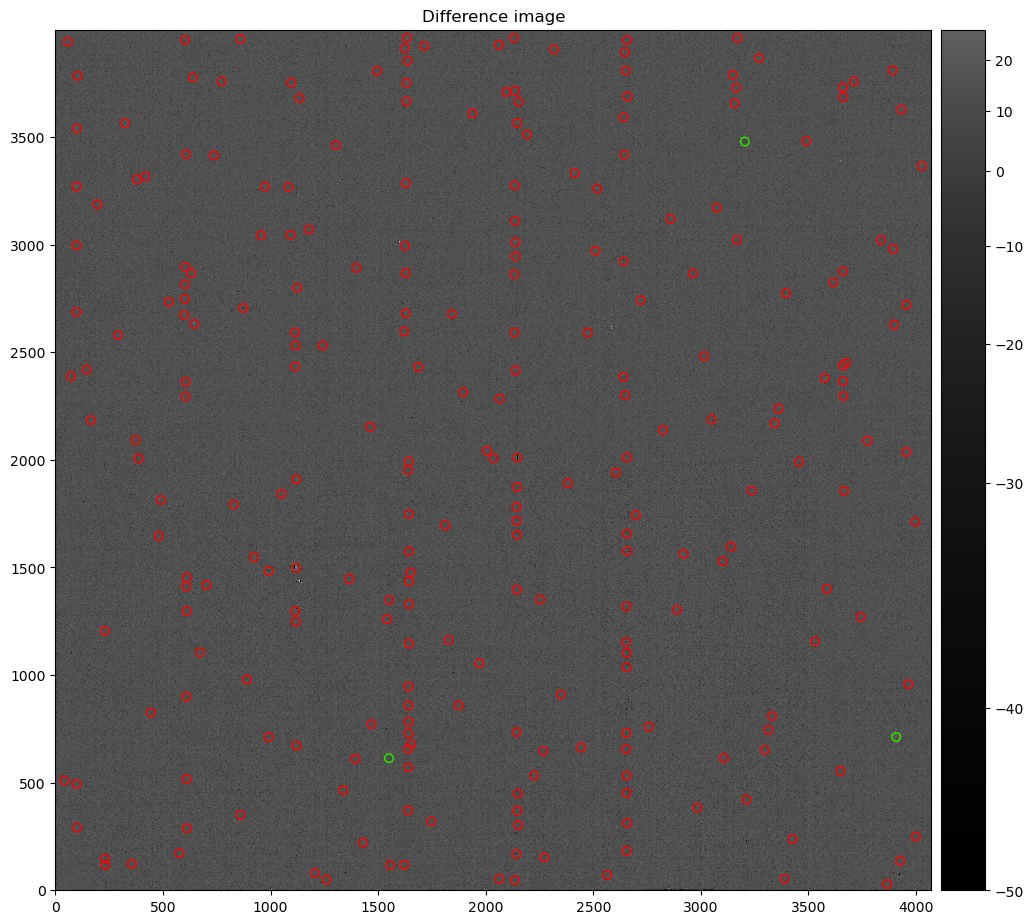

In [46]:
fig = plt.figure(figsize=(12, 12))
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(diff.image)
for x, y in diaSrc.asAstropy()[["slot_Centroid_x", "slot_Centroid_y"]]:
    display.dot("o", x, y, ctype="red", size=20)
for x, y in good_sources[["slot_Centroid_x", "slot_Centroid_y"]]:
    display.dot("o", x, y, ctype="green", size=20)
plt.title('Difference image')
plt.show()

In [47]:
[c for c in good_sources.columns if re.search("slot.*flag.*", c)]

['slot_Centroid_flag',
 'slot_Centroid_pos_flag',
 'slot_Centroid_neg_flag',
 'slot_PsfShape_flag',
 'slot_PsfShape_flag_no_pixels',
 'slot_PsfShape_flag_not_contained',
 'slot_PsfShape_flag_parent_source',
 'slot_PsfShape_flag_galsim',
 'slot_PsfShape_flag_edge',
 'slot_Shape_flag',
 'slot_Shape_flag_no_pixels',
 'slot_Shape_flag_not_contained',
 'slot_Shape_flag_parent_source',
 'slot_Shape_flag_galsim',
 'slot_Shape_flag_edge',
 'slot_ApFlux_flag',
 'slot_ApFlux_flag_apertureTruncated',
 'slot_PsfFlux_flag',
 'slot_PsfFlux_flag_noGoodPixels',
 'slot_PsfFlux_flag_edge',
 'slot_PsfFlux_flag_apCorr']

In [49]:
flags = PIXEL_FLAG_LIST + ["base_PixelFlags_flag"]
flags

['base_PixelFlags_flag_offimage',
 'base_PixelFlags_flag_edge',
 'base_PixelFlags_flag_interpolated',
 'base_PixelFlags_flag_saturated',
 'base_PixelFlags_flag_cr',
 'base_PixelFlags_flag_bad',
 'base_PixelFlags_flag_suspect',
 'base_PixelFlags_flag_interpolatedCenter',
 'base_PixelFlags_flag_saturatedCenter',
 'base_PixelFlags_flag_crCenter',
 'base_PixelFlags_flag_suspectCenter',
 'base_PixelFlags_flag']

## Make postage templ, sci, diff postage stamps for each of the good_sources

In [55]:
def show_cutout(exposure, x, y, size=30):
    """
    Create and show a cutout of an exposure given a position
    """
    xy = geom.PointI(x, y)
    cutoutSize = geom.ExtentI(size, size)
    bbox = geom.BoxI(xy - cutoutSize // 2, cutoutSize)
    cutout = exposure.getCutout(bbox)

    fig = plt.figure()
    plt.imshow(cutout.image.array, cmap="gray", origin='lower')

In [57]:
def show_cutout_triplet(template, science, diff, x, y, size=30, figsize=(8, 3)):
    """
    Create and show a cutout of an template, science and difference image
    given a position
    """
    xy = geom.PointI(x, y)
    cutoutSize = geom.ExtentI(size, size)
    bbox = geom.BoxI(xy - cutoutSize // 2, cutoutSize)

    template_cutout = template.getCutout(bbox)
    science_cutout = science.getCutout(bbox)
    diff_cutout = diff.getCutout(bbox)

    # Use diff sigma for calexp, diff ranges.
    sigma = np.sqrt(np.median(diff.variance.array))

    fit, axes = plt.subplots(1, 3, figsize=figsize)
    plt.sca(axes[0])
    plt.imshow(template_cutout.image.array, cmap="gray", origin='lower')
    plt.title("Template")
    plt.sca(axes[1])
    plt.imshow(science_cutout.image.array, cmap="gray", vmin=-5*sigma, vmax=+5*sigma, origin='lower')
    plt.title("Science")
    plt.sca(axes[2])
    plt.imshow(diff_cutout.image.array, cmap="gray", vmin=-5*sigma, vmax=+5*sigma, origin='lower')
    plt.title("Diff")

1550.6126708984375 613.4547119140625
3907.951171875 711.8670654296875
3204.141845703125 3479.147705078125


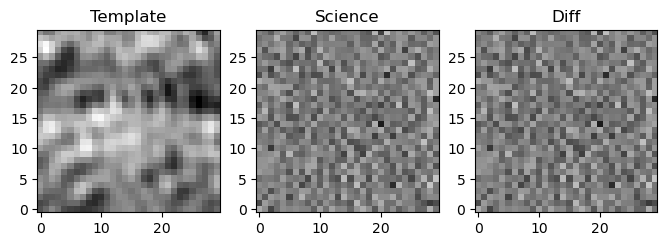

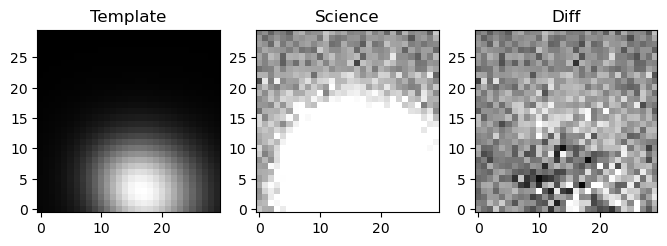

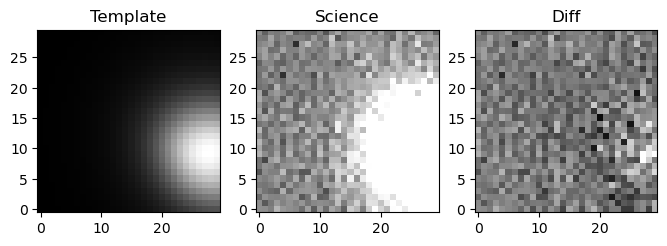

In [58]:
stamp_size = 30 # pixels.  Size of baseline alert stamp
for x, y in good_sources[["slot_Centroid_x", "slot_Centroid_y"]]:
    print(x, y)
    show_cutout_triplet(matched_template, calexp, diff, x, y, size=stamp_size)
    #break

## Check the performance of the sky sources

In [62]:
# What is the difference between sky_sources and diaSrc?
# Sky sources are implemented in exactly the same manner as sky objects, with up to nSources sky sources randomly placed for any given CCD.
# Sky objects are pseudo-objects injected into the data processing pipeline 
# https://community.lsst.org/t/sky-sources-added-to-single-frame-processing/4137
sky_sources = diaSrc.asAstropy()
sky_sources = sky_sources[sky_sources["sky_source"]]  

1.2841297645550005
1.3830954813157417


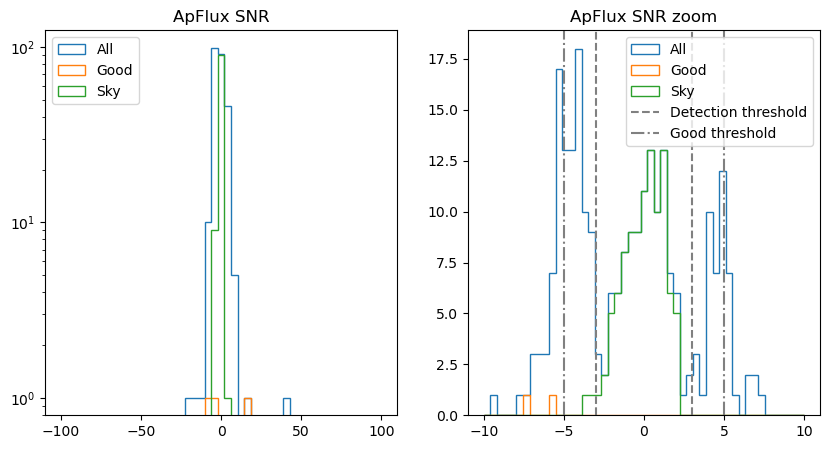

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

plt.sca(axes[0])
bins = np.linspace(-100, +100)
hkwargs = {"bins": bins, "histtype": "step"}
# plt.hist(diaSrc["slot_PsfFlux_instFlux"] / diaSrc["slot_PsfFlux_instFluxErr"], label="InstFlux SNR (all)", **hkwargs)
# plt.hist(good_sources["slot_PsfFlux_instFlux"] / good_sources["slot_PsfFlux_instFluxErr"], label="InstFlux SNR (good)", **hkwargs)
plt.hist(diaSrc["slot_ApFlux_instFlux"] / diaSrc["slot_ApFlux_instFluxErr"], label="All", **hkwargs)
plt.hist(good_sources["slot_ApFlux_instFlux"] / good_sources["slot_ApFlux_instFluxErr"], label="Good", **hkwargs)
plt.hist(sky_sources["slot_ApFlux_instFlux"] / sky_sources["slot_ApFlux_instFluxErr"], label="Sky", **hkwargs)
plt.yscale("log")
plt.title("ApFlux SNR")
plt.legend(loc="upper left");

# Detection should be at 3-sigma
# Let's zoom in and see
plt.sca(axes[1])
bins = np.linspace(-10, +10)
hkwargs = {"bins": bins, "histtype": "step"}
# plt.hist(diaSrc["slot_PsfFlux_instFlux"] / diaSrc["slot_PsfFlux_instFluxErr"], label="InstFlux SNR (all)", **hkwargs)
# plt.hist(good_sources["slot_PsfFlux_instFlux"] / good_sources["slot_PsfFlux_instFluxErr"], label="InstFlux SNR (good)", **hkwargs)
plt.hist(diaSrc["slot_ApFlux_instFlux"] / diaSrc["slot_ApFlux_instFluxErr"], label="All", **hkwargs)
plt.hist(good_sources["slot_ApFlux_instFlux"] / good_sources["slot_ApFlux_instFluxErr"], label="Good", **hkwargs)
plt.hist(sky_sources["slot_ApFlux_instFlux"] / sky_sources["slot_ApFlux_instFluxErr"], label="Sky", **hkwargs)
print(np.std(sky_sources["slot_ApFlux_instFlux"] / sky_sources["slot_ApFlux_instFluxErr"]))

from lsst.analysis.tools.statistics import nansigmaMad
print(nansigmaMad(sky_sources["slot_ApFlux_instFlux"] / sky_sources["slot_ApFlux_instFluxErr"]))

plt.axvline(3, color="grey", linestyle="--", label="Detection threshold")
plt.axvline(-3, color="grey", linestyle="--")
# where does 5 sigma come from?
plt.axvline(5, color="grey", linestyle="-.", label="Good threshold")
plt.axvline(-5, color="grey", linestyle="-.")
plt.title("ApFlux SNR zoom")
plt.legend();


## Analysis Tools

Generate the analysis tools plots and statistics

Do this directly in the Notebook, following analysis_tools_examples

In [73]:
plot_info_dict = {"bands": data_id["band"], "visit": data_id["visit"], "run": ap_collection, "tableName": "deepDiff_diaSrc"}

In [74]:
plot = SkySourceHistPlot()

In [75]:
# Use the GoodDiaSourceSelector to get the standard pixel flag selection of good DIA sources
plot.prep.selectors.skySourceSelector = GoodDiaSourceSelector
# And then specify that we just want the sky sources
plot.prep.selectors.skySourceSelector.selectWhenTrue = ["sky_source"]

# We have to rename the columns from the SkySource assumptions of having a DPDD-ified catalog
plot.process.buildActions.hist_psf_flux.vectorKey = "slot_PsfFlux_instFlux"
plot.process.buildActions.hist_ap09_flux.vectorKey = "base_CircularApertureFlux_9_0_instFlux"
plot.process.buildActions.hist_psf_sn.fluxType = "slot_PsfFlux_instFlux"
plot.process.buildActions.hist_ap09_sn.fluxType = "base_CircularApertureFlux_9_0_instFlux"

In [76]:
plot.produce.plot.panels["panel_flux"].bins = 25
plot.produce.plot.panels["panel_sn"].bins = 25

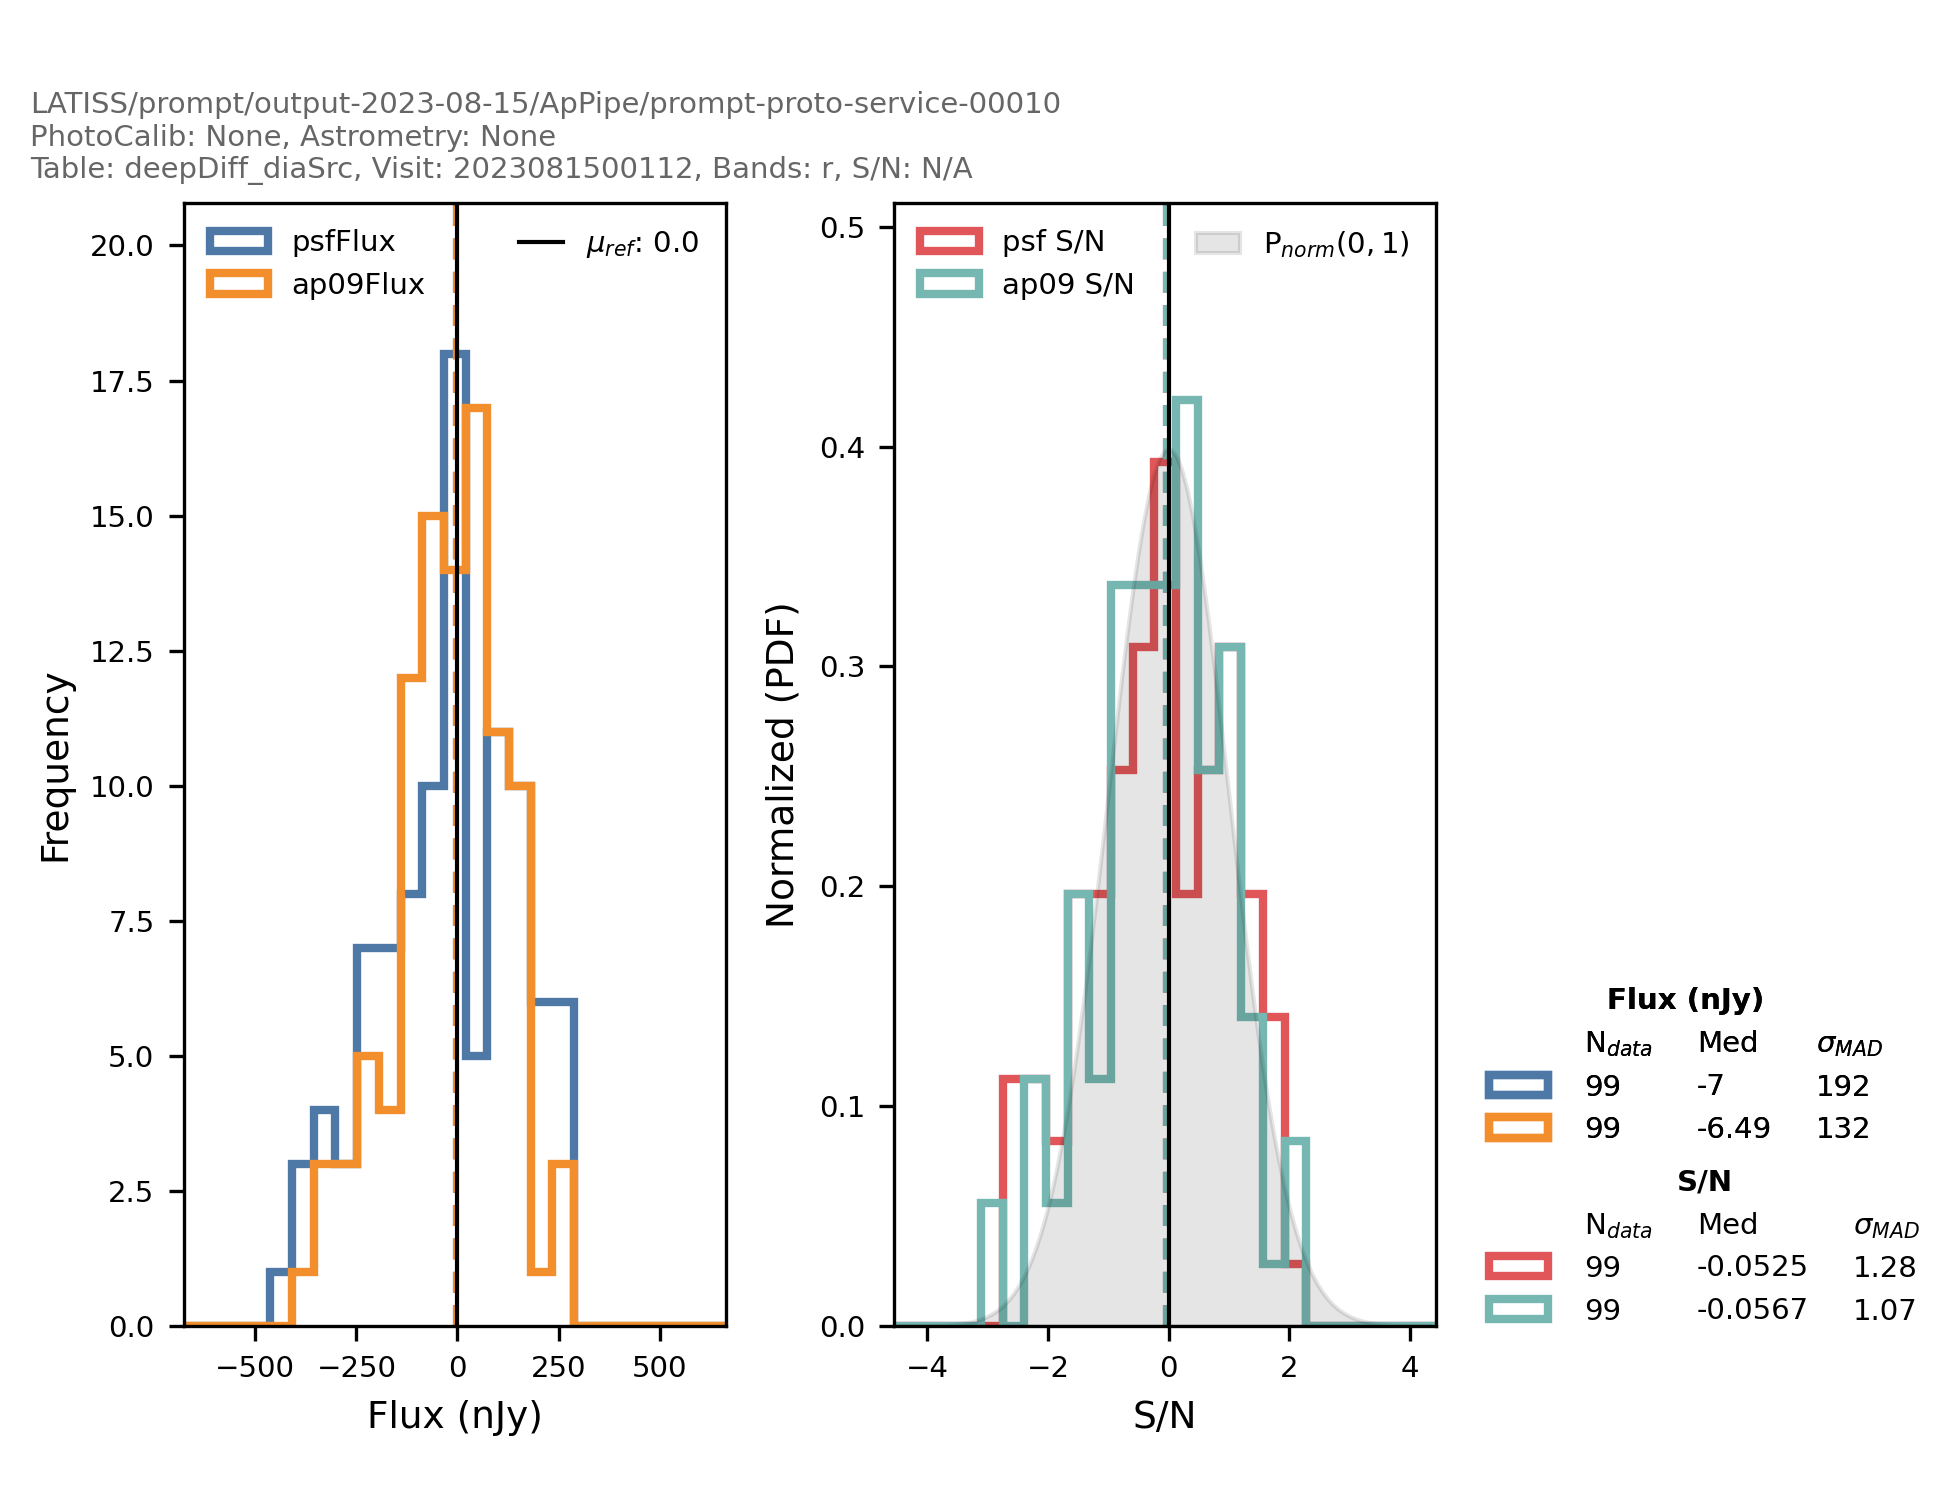

In [77]:
plot.finalize()
results = plot(diaSrc, band=data_id["band"], plotInfo=plot_info_dict)

This pipetasks wouldn't work because apCcdVisitQualityCore.yaml requires fakes_deepDiff_assocDiaSrc and we don't have the assocDiaSrc files.

! pipetask run -p apCcdVisitQualityCore.yaml \
-b /sdf/group/rubin/repo/embargo \
-i "LATISS/prompt/output-2023-08-15/ApPipe/prompt-proto-service-00010" \
-o u/wmwv/newDiaPlot \
--register-dataset-types

In [78]:
plot = SkySourceSkyPlot()

# Use the GoodDiaSourceSelector to get the standard pixel flag selection of good DIA sources
plot.prep.selectors.skySourceSelector = GoodDiaSourceSelector
# And then specify that we just want the sky sources
plot.prep.selectors.skySourceSelector.selectWhenTrue = ["sky_source"]

# We have to rename the columns from the SkySource assumptions of having a DPDD-ified catalog
plot.process.buildActions.z.vectorKey = "base_CircularApertureFlux_9_0_instFlux"
plot.process.buildActions.statMask.fluxType = "slot_PsfFlux_instFlux"

# Convert from rad to degree
# I think this is the simplest way to do it
# We have to override the existing x, y VectorActions
plot.process.buildActions.x = ConvertUnits(buildAction=LoadVector, inUnit="rad", outUnit="degree")
plot.process.buildActions.x.buildAction.vectorKey = "coord_ra"
plot.process.buildActions.y = ConvertUnits(buildAction=LoadVector, inUnit="rad", outUnit="degree")
plot.process.buildActions.y.buildAction.vectorKey = "coord_dec"

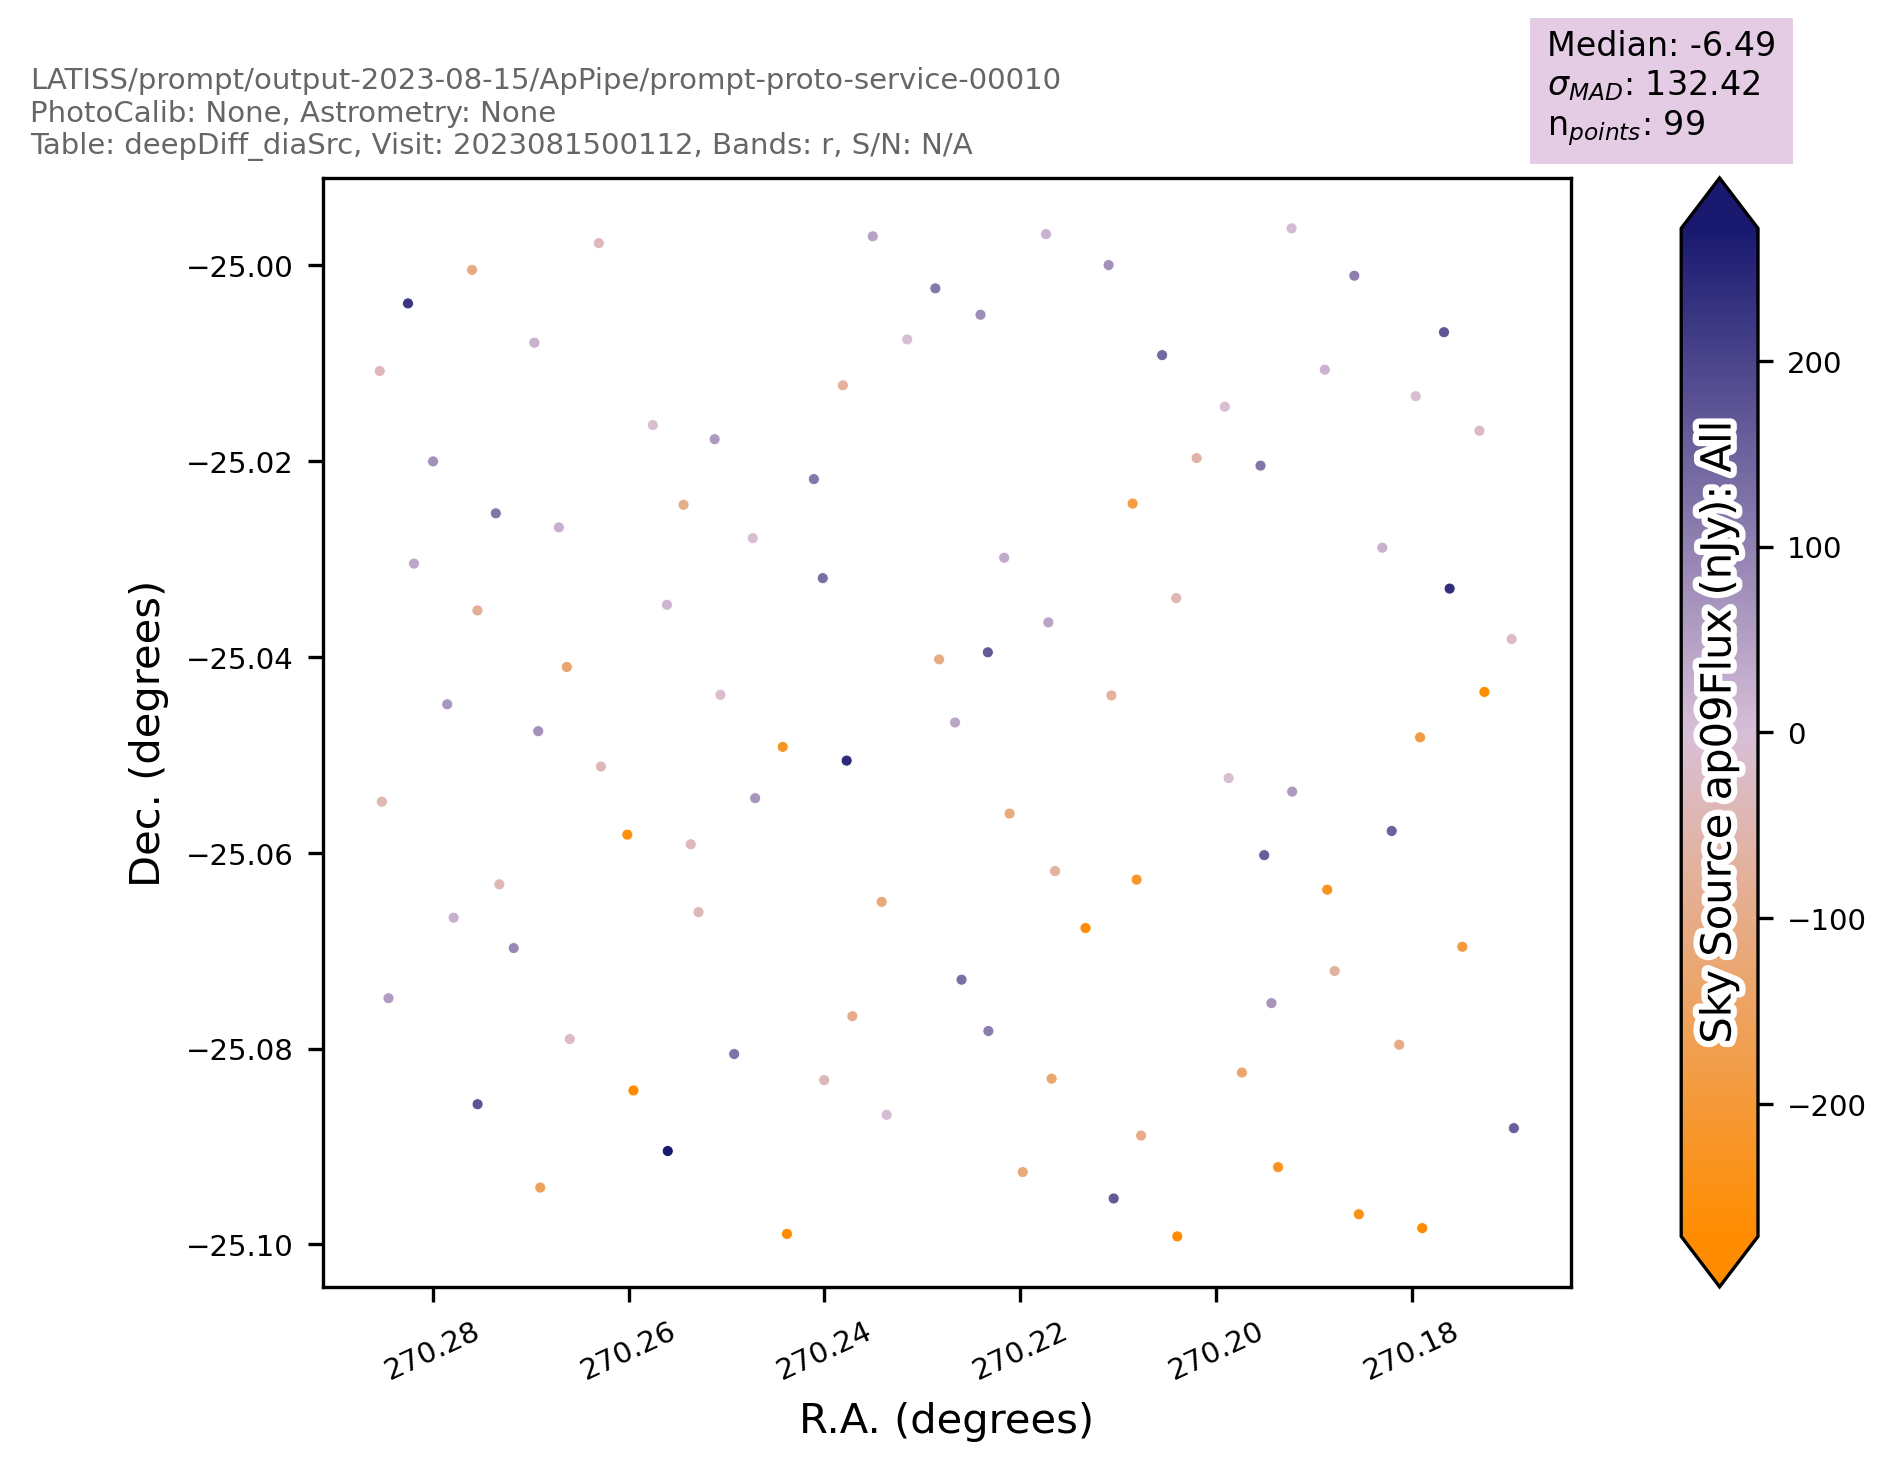

In [79]:
plot.finalize()
results = plot(diaSrc, band=data_id["band"], plotInfo=plot_info_dict)